In [91]:
# COPY THIS
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/data102')

Mounted at /content/drive


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import itertools

In [93]:
!pip install sodapy
from sodapy import Socrata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
os.chdir('data/')

In [95]:
!wget -O "cdi.csv" "https://chronicdata.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD"

--2023-04-25 04:30:26--  https://chronicdata.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD
Resolving chronicdata.cdc.gov (chronicdata.cdc.gov)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to chronicdata.cdc.gov (chronicdata.cdc.gov)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘cdi.csv’

cdi.csv                 [  <=>               ] 342.67M  7.76MB/s    in 45s     

2023-04-25 04:31:12 (7.65 MB/s) - ‘cdi.csv’ saved [359317765]



In [96]:
cdi = pd.read_csv('cdi.csv')

<ipython-input-96-9cdd50d987b2>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  cdi = pd.read_csv('cdi.csv')


In [97]:
cdi.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [98]:
cdi.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [99]:
groups = cdi.groupby("Topic").max()
topics = groups.index.values.tolist()
topics

<ipython-input-99-80939149b5ec>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  groups = cdi.groupby("Topic").max()


['Alcohol',
 'Arthritis',
 'Asthma',
 'Cancer',
 'Cardiovascular Disease',
 'Chronic Kidney Disease',
 'Chronic Obstructive Pulmonary Disease',
 'Diabetes',
 'Disability',
 'Immunization',
 'Mental Health',
 'Nutrition, Physical Activity, and Weight Status',
 'Older Adults',
 'Oral Health',
 'Overarching Conditions',
 'Reproductive Health',
 'Tobacco']

In [100]:
nut = cdi[cdi["Topic"] == 'Nutrition, Physical Activity, and Weight Status']
nut.shape

(75418, 34)

In [101]:
nut =  nut.reset_index()

In [102]:
hs_soda = nut[nut["Question"] == "Soda consumption among high school students"]

In [103]:
hs_soda[['YearStart', 'YearEnd', 'LocationAbbr', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1']]

,YearStart,YearEnd,LocationAbbr,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
2,2019,2019,MI,%,Crude Prevalence,18.0,18.0,16.1,20.0,Gender,Male
16,2019,2019,MS,%,Crude Prevalence,23.1,23.1,20.1,26.4,Gender,Female
24,2013,2013,TN,%,Crude Prevalence,32.4,32.4,27.8,37.3,Gender,Female
25,2013,2013,KS,%,Crude Prevalence,18.6,18.6,13.5,25.1,Race/Ethnicity,Hispanic
32,2015,2015,KY,%,Crude Prevalence,28.6,28.6,21.0,37.6,Race/Ethnicity,"Black, non-Hispanic"
...,...,...,...,...,...,...,...,...,...,...,...
7514,2019,2019,TX,%,Crude Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Asian, non-Hispanic"
7516,2019,2019,HI,%,Crude Prevalence,11.2,11.2,9.4,13.3,Race/Ethnicity,Hispanic
7517,2013,2013,LA,%,Crude Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native
7525,2019,2019,ID,%,Crude Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Asian, non-Hispanic"


In [104]:
ad_ob = nut[nut["Question"] == "Obesity among adults aged >= 18 years"]
ad_ob[['YearStart', 'YearEnd', 'LocationAbbr', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1']]

,YearStart,YearEnd,LocationAbbr,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
17904,2017,2017,AK,%,Age-adjusted Prevalence,33.8,33.8,30.1,37.8,Gender,Male
17907,2021,2021,AK,%,Age-adjusted Prevalence,34.9,34.9,31.9,38.0,Gender,Female
17915,2016,2016,AK,%,Age-adjusted Prevalence,NaN,NaN,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic"
17920,2015,2015,AK,%,Crude Prevalence,29.1,29.1,20.4,39.7,Race/Ethnicity,"Multiracial, non-Hispanic"
17928,2013,2013,AK,%,Crude Prevalence,23.2,23.2,16.6,31.5,Race/Ethnicity,"Multiracial, non-Hispanic"
...,...,...,...,...,...,...,...,...,...,...,...
75391,2020,2020,WY,%,Age-adjusted Prevalence,31.0,31.0,19.5,45.5,Race/Ethnicity,"Other, non-Hispanic"
75394,2020,2020,WY,%,Age-adjusted Prevalence,30.0,30.0,27.2,32.8,Gender,Male
75395,2020,2020,WY,%,Crude Prevalence,31.4,31.4,28.6,34.3,Gender,Female
75410,2020,2020,WY,%,Age-adjusted Prevalence,30.0,30.0,27.8,32.3,Race/Ethnicity,"White, non-Hispanic"


CDI possible questions:
* Compare soda consumption across years, how does it correlate to diabetes?
* Compare soda consumption between states


    * GLM?

In [ ]:
client = Socrata("data.cdc.gov", None)
results = client.get("fcqm-xrf4", where = "year = '2014'", limit = 100000)
pm_2014 = pd.DataFrame.from_records(results)
pm_2014

In [ ]:
client = Socrata("data.cdc.gov", None)
results = client.get("372p-dx3h", where = "`year` = '2014'", limit = 100000)

ozone = pd.DataFrame.from_records(results)
ozone

Does higher pm cause a lower o3?


    *   Causal Inference?



In [107]:
# COPY THIS
from google.colab import drive
import os

drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/MyDrive/data102')

Mounted at /content/drive


In [108]:
folder = "data/categorical_diabetes/"
os.listdir(folder)

['diabetes_male.csv',
 'diabetes_female.csv',
 'diabetes_18_44.csv',
 'diabetes_45_64.csv',
 'diabetes_65_74.csv',
 'diabetes_75+.csv',
 'diabetes aggregation']

In [109]:
data = None
for fname in os.listdir(folder):
  if '.csv' in fname:
    data_name = '-'.join(fname.split('.')[0].split('_')[1:])
    df = pd.read_csv(folder+fname, header=2, index_col=0)
    df = df.iloc[1:, 0:1].rename(columns={'Percentage': data_name})
    if data is None: data = df
    else: data = data.join(df)
data.head()

,male,female,18-44,45-64,65-74,75+
State,,,,,,
Alabama,12.0,11.5,4.8,17.8,24.3,21.0
Alaska,6.7,8.6,1.8,10.3,21.3,21.0
Arizona,10.1,8.3,2.8,14.0,21.8,18.7
Arkansas,11.9,11.3,3.9,17.9,24.7,22.8
California,10.9,9.0,2.9,15.4,21.5,22.5


In [123]:
diabetes = data[["male", "female"]]
#no data rows + drop guam, puerto rico - only 50 states
diabetes = diabetes.iloc[:-2]
# convert to float
diabetes = diabetes.astype({'male':'float','female':'float'})
diabetes

,male,female
State,,
Alabama,12.0,11.5
Alaska,6.7,8.6
Arizona,10.1,8.3
Arkansas,11.9,11.3
California,10.9,9.0
Colorado,7.4,6.5
Connecticut,8.5,7.7
Delaware,10.5,9.2
District of Columbia,9.1,9.4


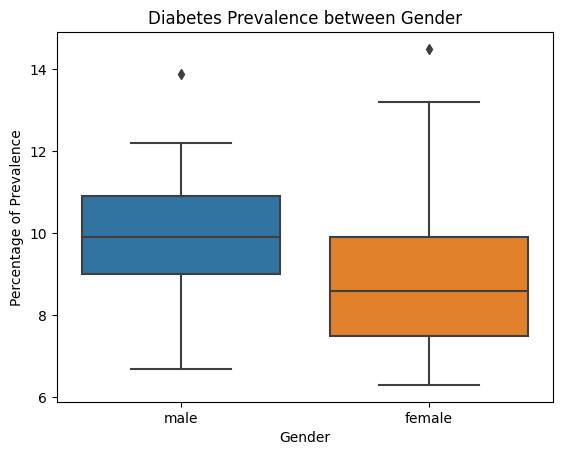

In [125]:
sns.boxplot(x="variable", y="value", data=pd.melt(diabetes))
plt.title("Diabetes Prevalence between Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of Prevalence");